# Icing: An Observational Study 🥶

Hypothesis: Icing a kicker prior to an attempty reduces the likelihood of conversion.

## Load & Clean

In [108]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import mysql.connector
import itertools
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from util.data import clean, get_data

In [109]:
cnx = mysql.connector.connect(user='root', password='mOntie20!mysql', host='127.0.0.1', database='nfl')
df = get_data(cnx, 'g.seas<=2019', xp=False, base='raw_6_cat')
df = clean(df, dropna=False)
df

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
17,MA-0700,1,43,2000,19,79,ATL,Georgia Dome,ATL,0,...,0,0,0,0,0,1,0,1,NaN,855
34,MA-0700,1,44,2000,19,79,ATL,Georgia Dome,ATL,0,...,0,0,0,0,0,1,0,1,1.000000,856
52,MA-0700,1,24,2000,19,79,ATL,Georgia Dome,ATL,0,...,0,0,0,0,0,1,0,1,1.000000,857
64,MA-0700,1,44,2000,19,79,ATL,Georgia Dome,ATL,0,...,0,0,0,0,0,1,0,1,1.000000,858
95,MA-0700,1,48,2000,19,79,ATL,Georgia Dome,ATL,0,...,0,0,0,0,0,1,0,1,1.000000,859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872984,RG-1500,1,27,2019,15,58,SF,Levi's Stadium,SF\r,0,...,0,5,0,1,0,0,0,1,0.984969,437
873062,RG-1500,1,42,2019,15,58,SF,Levi's Stadium,SF\r,0,...,0,5,0,1,1,0,0,2,0.987702,438
873087,RG-1500,1,38,2019,15,64,KC,Arrowhead Stadium,SF\r,0,...,0,7,1,1,0,0,0,1,0.989938,439


In [110]:
df.describe()

,good,dist,year,seasons,temperature,XP,age,altitude,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
count,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.0,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18710.000000,18803.000000
mean,0.844865,36.881242,2009.516992,7.913099,59.998032,0.0,29.927139,0.033771,0.352178,6.549593,0.487901,0.040845,0.125033,0.445408,0.080413,1.400202,0.846149,255.230601
std,0.362043,10.070235,5.643918,5.162924,15.656103,0.0,5.250091,0.180645,0.477662,5.986469,0.499867,0.197935,0.330765,0.497024,0.271938,1.024004,0.123667,209.053136
min,0.000000,18.000000,2000.000000,1.000000,-6.000000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,2005.000000,4.000000,50.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.773014,94.000000
50%,1.000000,37.000000,2010.000000,7.000000,62.000000,0.0,29.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.866512,201.000000
75%,1.000000,45.000000,2014.000000,11.000000,70.000000,0.0,33.000000,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.948108,362.000000
max,1.000000,76.000000,2019.000000,26.000000,109.000000,0.0,47.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1033.000000


## Explore

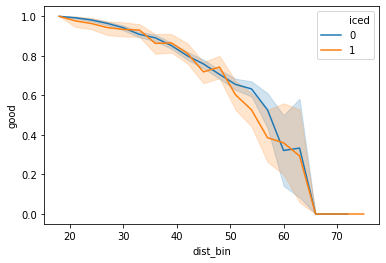

In [111]:
df_ = df.copy()
df_['dist_bin'] = 3*round(df_['dist']/3)
sns.lineplot(x='dist_bin', y='good', hue='iced', data=df_)

## Pair

In [112]:
df_iced = df[(df['iced']==1) & (df['dist']>=45)]
df_iced.dropna(inplace=True)
df_iced

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
7339,MA-0700,1,45,2000,19,81,ATL,Georgia Dome,ATL,0,...,0,0,0,0,1,1,0,1,0.744334,865
8781,JC-0900,1,45,2000,13,72,SD,Qualcomm Stadium,SD\r,0,...,0,9,0,0,1,0,0,1,0.868024,592
9506,MV-0100,1,45,2000,3,70,BUF,Ralph Wilson Stadium,IND,0,...,0,10,1,0,1,1,0,6,0.857741,141
10574,SL-0600,1,48,2000,2,76,JAC,Alltel Stadium,JAC,0,...,0,14,0,0,1,0,1,1,0.779455,94
10828,JW-3300,1,51,2000,7,70,STL,Trans World Dome,STL,0,...,0,0,0,0,1,1,0,1,1.000000,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866819,JS-0350,0,47,2019,2,76,MIA,Hard Rock Stadium,MIA,0,...,1,15,0,0,1,0,0,2,0.808073,46
869568,JL-0207,1,56,2019,5,74,JAC,TIAA Bank Field,JAC,0,...,1,6,0,0,1,0,0,1,0.975337,141
871292,BM-1650,0,57,2019,7,31,DEN,Broncos Stadium at Mile High,DEN,0,...,0,6,0,0,1,0,0,2,0.972636,180


In [113]:
def get_mask(data, row, ddist=3, dwind=5, dtemp=5, dyear=1, dpres=0, dkicks=100, dseas=2, dage=2):
    mask = (data['iced']!=row['iced']) &\
           (abs(data['kicks']-row['kicks'])<=dkicks) &\
           (abs(data['seasons']-row['seasons'])<=dseas) &\
           (abs(data['age']-row['age'])<=dseas) &\
           (abs(data['dist']-row['dist'])<=ddist) &\
           (abs(data['wind']-row['wind'])<=dwind) &\
           (abs(data['temperature']-row['temperature'])<=dtemp) &\
           (abs(data['year']-row['year'])<=dyear) &\
           (data['postseason']==row['postseason']) &\
           (data['turf']==row['turf']) &\
           (data['altitude']==row['altitude']) &\
           (data['away_game']==row['away_game']) &\
           (data['precipitation']==row['precipitation']) &\
           (abs(data['pressure']-row['pressure'])<=dpres)
    return mask

def get_diff(df, row):
    for i in row.index:
        if not isinstance(row[i],str):
            df[i+'_d'] = df[i].sub(row[i]).abs()
    return df

In [114]:
noice = {}
for index, row in df_iced.iterrows():
    mask = get_mask(df, row)
    df_choices = get_diff(df[mask],row).sort_values(['dist_d','year_d','kicks_d','wind_d','temperature_d','seasons_d','age_d'])
    for i, choice in df_choices.iterrows():
        if i not in noice:
            choice['match_pid'] = index
            noice[i] = choice
            break
print(len(df_iced)-len(noice), 'are missing matches.')
df_noice = pd.DataFrame.from_dict(noice, orient='index').sort_values(['dist_d','year_d','seasons_d'])
df_noice

469 are missing matches.


,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,wind_d,away_game_d,postseason_d,iced_d,turf_d,precipitation_d,pressure_d,form_d,kicks_d,match_pid
56297,JK-0200,1,45,2001,11,51,CAR,Ericsson Stadium,CAR,0,...,0,0,0,1,0,0,0,0.000000,1,56287
114057,MV-0100,1,46,2002,5,70,IND,RCA Dome,IND,0,...,0,0,0,1,0,0,0,0.014267,10,104364
180282,JS-1100,1,48,2004,1,85,JAC,Alltel Stadium,JAC,0,...,1,0,0,1,0,0,0,0.253147,13,196085
256886,JW-3300,1,49,2005,12,75,DAL,Texas Stadium,STL,0,...,0,0,0,1,0,0,0,0.120700,17,229470
242304,LT-1100,1,47,2005,2,58,KC,Arrowhead Stadium,KC\r,0,...,0,0,0,1,0,0,0,0.127777,8,234947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494319,NF-0300,1,49,2011,5,57,BUF,Ralph Wilson Stadium,NYJ,0,...,1,0,0,1,0,0,0,0.109896,78,431017
600552,DB-0200,1,50,2013,3,70,DAL,AT&T Stadium,DAL,0,...,0,0,0,1,0,0,0,0.146352,13,559927
572102,BC-3000,1,51,2013,12,68,CLE,FirstEnergy Stadium,CLE,0,...,4,0,0,1,0,0,0,0.346271,66,634366
675132,DB-0200,1,53,2015,5,79,TB,Raymond James Stadium,DAL,0,...,5,0,0,1,0,0,0,0.360250,59,729483


In [115]:
missing = df_iced.drop(index=df_noice['match_pid'])
missing

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
9506,MV-0100,1,45,2000,3,70,BUF,Ralph Wilson Stadium,IND,0,...,0,10,1,0,1,1,0,6,0.857741,141
10574,SL-0600,1,48,2000,2,76,JAC,Alltel Stadium,JAC,0,...,0,14,0,0,1,0,1,1,0.779455,94
14377,PD-0200,1,45,2000,3,59,DEN,Mile High Stadium,CLE,0,...,0,7,1,0,1,0,0,1,0.597736,142
15036,DB-3900,0,51,2000,7,74,NO,Louisiana Superdome,NO\r,0,...,0,0,0,0,1,0,0,1,1.000000,321
15100,JN-0600,1,46,2000,5,74,NO,Louisiana Superdome,CAR,0,...,0,0,1,0,1,0,0,1,0.757025,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862253,JS-0350,1,47,2019,2,41,NYJ,MetLife Stadium,MIA,0,...,0,9,1,0,1,1,0,2,0.808499,41
866819,JS-0350,0,47,2019,2,76,MIA,Hard Rock Stadium,MIA,0,...,1,15,0,0,1,0,0,2,0.808073,46
871292,BM-1650,0,57,2019,7,31,DEN,Broncos Stadium at Mile High,DEN,0,...,0,6,0,0,1,0,0,2,0.972636,180


In [116]:
df_iced = df_iced.loc[df_noice['match_pid'],:]
df_iced

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
56287,JK-0200,1,45,2001,11,51,CAR,Ericsson Stadium,CAR,0,...,0,10,0,0,1,0,0,1,1.000000,456
104364,MV-0100,0,46,2002,5,70,IND,RCA Dome,IND,0,...,0,0,0,0,1,1,0,1,0.811214,211
196085,JS-1100,1,48,2004,1,80,JAC,Alltel Stadium,JAC,0,...,0,4,0,0,1,0,1,1,0.851154,16
229470,JW-3300,1,49,2005,12,70,IND,RCA Dome,STL,0,...,0,0,1,0,1,1,0,1,0.865914,478
234947,LT-1100,1,47,2005,2,55,KC,Arrowhead Stadium,KC\r,0,...,1,8,0,0,1,0,0,1,0.974504,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431017,DC-0500,0,46,2010,3,62,BUF,Ralph Wilson Stadium,MIA,0,...,1,7,1,0,1,1,0,1,0.862371,54
559927,GH-0600,1,53,2012,5,75,NO,Mercedes-Benz Superdome,NO\r,0,...,0,0,0,0,1,1,0,1,0.837242,78
634366,NN-0200,0,48,2014,10,72,SD,Qualcomm Stadium,SD\r,0,...,0,13,0,0,1,0,0,1,0.992534,136


## Model

We work within a Bayesian framework, setting a prior distribution on the true population proportion and update the prior after our observations. The Beta-Binomial conjugacy makes this process relatively pain-free.

In [117]:
from scipy.stats import beta
p_hat = df[df['dist']>=40]['good'].mean()
# beta_ = 2
# alpha_ = int(round(p_hat*beta_/(1-p_hat)))
alpha_ = 12
beta_ = int(round(alpha_*(1-p_hat)/p_hat))
print(f'alpha: {alpha_}, beta: {beta_}')

alpha: 12, beta: 5


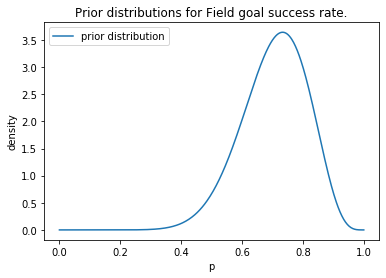

In [118]:
x = np.linspace(0,1,500)
plt.plot(x, beta(alpha_, beta_).pdf(x), label='prior distribution')
plt.xlabel('p')
plt.ylabel('density')
plt.title('Prior distributions for Field goal success rate.')
plt.legend()
plt.show()

In [119]:
from scipy.stats import beta
posterior_noice = beta(alpha_ + df_noice['good'].sum(), beta_ + len(df_noice) - df_noice['good'].sum())
posterior_ice = beta(alpha_ + df_iced['good'].sum(), beta_ + len(df_iced) - df_iced['good'].sum())
samples = 20000
samples_posterior_noice = posterior_noice.rvs(samples)
samples_posterior_ice = posterior_ice.rvs(samples)

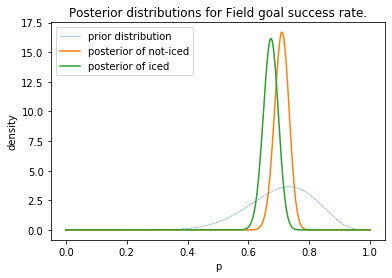

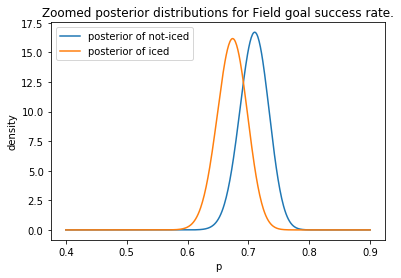

In [120]:
x = np.linspace(0,1,500)
plt.plot(x, beta(alpha_, beta_).pdf(x), label='prior distribution', linestyle='dashed', linewidth=0.5)
plt.plot(x, posterior_noice.pdf(x), label='posterior of not-iced')
plt.plot(x, posterior_ice.pdf(x), label='posterior of iced')
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distributions for Field goal success rate.')
plt.legend()
plt.show()

x = np.linspace(0.4,0.9,500)
plt.plot(x, posterior_noice.pdf(x), label='posterior of not-iced')
plt.plot(x, posterior_ice.pdf(x), label='posterior of iced')
plt.xlabel('p')
plt.ylabel('density')
plt.title('Zoomed posterior distributions for Field goal success rate.')
plt.legend()
plt.show()

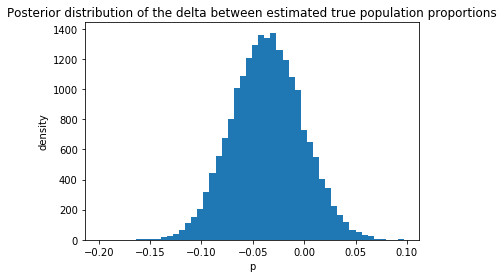

85 % likely that iced has a lower true population proportion of converted field goals.
-0.04 is the median difference, with credible interval of (-0.1,0.03).


In [121]:
posterior_diff = samples_posterior_ice - samples_posterior_noice

plt.hist(posterior_diff, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of the delta between estimated true population proportions')
plt.show()
print(int((samples_posterior_ice<samples_posterior_noice).mean()*100), r'% likely that iced has a lower true population proportion of converted field goals.')

from scipy.stats import bayes_mvs
center, _, std = bayes_mvs(posterior_diff, alpha=0.95)
print(f'{round(center.statistic,2)} is the median difference, with credible interval of ({round(center.statistic-1.96*std.statistic,2)},{round(center.statistic+1.96*std.statistic,2)}).')

80 % likely relative lift less than -1%.
-0.05 is the median relative lift, with credible interval of (-0.14,0.04).


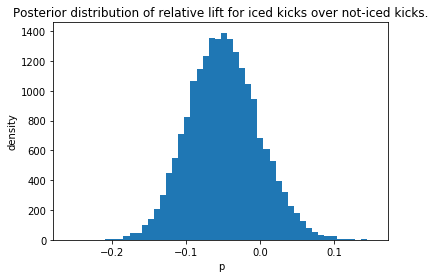

In [122]:
posterior_relative = (samples_posterior_ice-samples_posterior_noice)/samples_posterior_noice
plt.hist(posterior_relative, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of relative lift for iced kicks over not-iced kicks.')
print(int((posterior_relative<-0.01).mean()*100), r'% likely relative lift less than -1%.')

center, _, std = bayes_mvs(posterior_relative, alpha=0.95)
print(f'{round(center.statistic,2)} is the median relative lift, with credible interval of ({round(center.statistic-1.96*std.statistic,2)},{round(center.statistic+1.96*std.statistic,2)}).')

## Conclusions

* We are only 79% sure icing has a negative effect on kickers.
* The median true proportion difference was -0.02 (2% points lower) with a 95% credible interval of -0.08 to -0.03.
* The median of relative change is -3% with a 95% CI between -11% and +5%.
* Overall, the effect is said to be weakly negative.
* With this is mind, is icing a kicker worth the cost of a timeout? Football might be a game of inches (or rather, yards), but the relatively minor effect of icing (whether it actually be positive or negative), I'd argue, is not worth the timeout.